In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("StudentsPerformance.csv")
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
# Add a new column: average score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
#df[['math score','reading score','writing score']]
#select only those three columns from the DataFrame
#mean(axis=1)
#calculates the mean across those three columns for each row(i.e for each student)


In [4]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average_score'],
      dtype='object')


In [11]:
high_achiever=df[df['average_score']>80]

In [13]:
high_achiever

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
6,female,group B,some college,standard,completed,88,95,92,91.666667
16,male,group C,high school,standard,none,88,89,86,87.666667
34,male,group E,some college,standard,none,97,87,82,88.666667
...,...,...,...,...,...,...,...,...,...
982,male,group B,some high school,standard,completed,79,85,86,83.333333
983,female,group A,some college,standard,completed,78,87,91,85.333333
990,male,group E,high school,free/reduced,completed,86,81,75,80.666667
995,female,group E,master's degree,standard,completed,88,99,95,94.000000


In [14]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

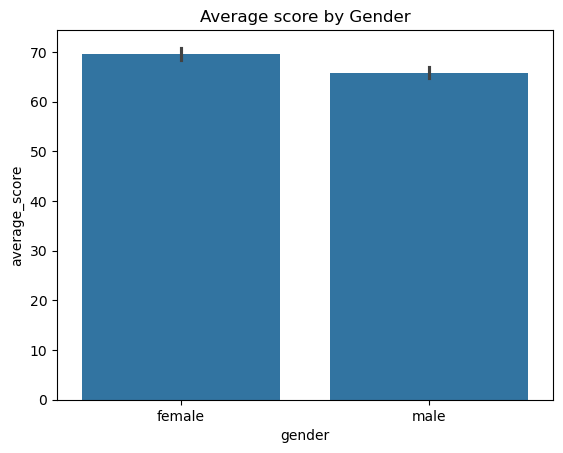

In [17]:
sns.barplot(x='gender',y='average_score',data=df)
plt.title('Average score by Gender')
plt.show()

<Axes: >

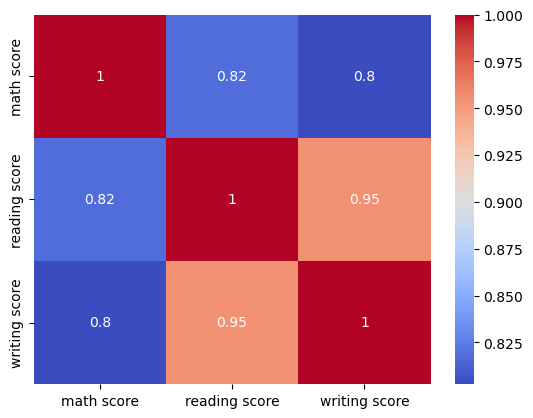

In [19]:
sns.heatmap(df[['math score','reading score','writing score']].corr(),annot=True,cmap='coolwarm')

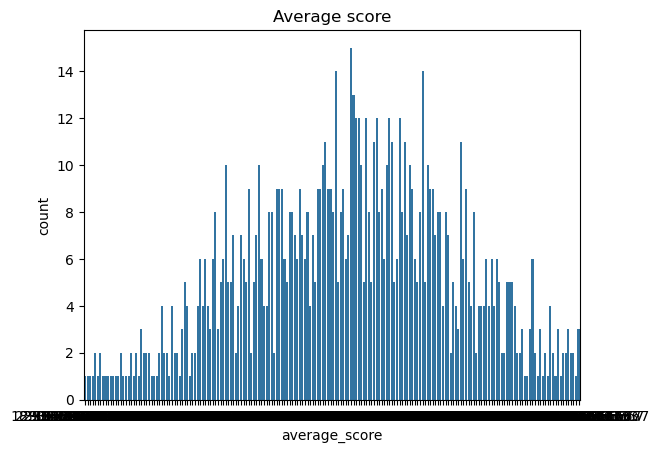

In [20]:
sns.countplot(x='average_score',data=df)
plt.title("Average score")
plt.show()

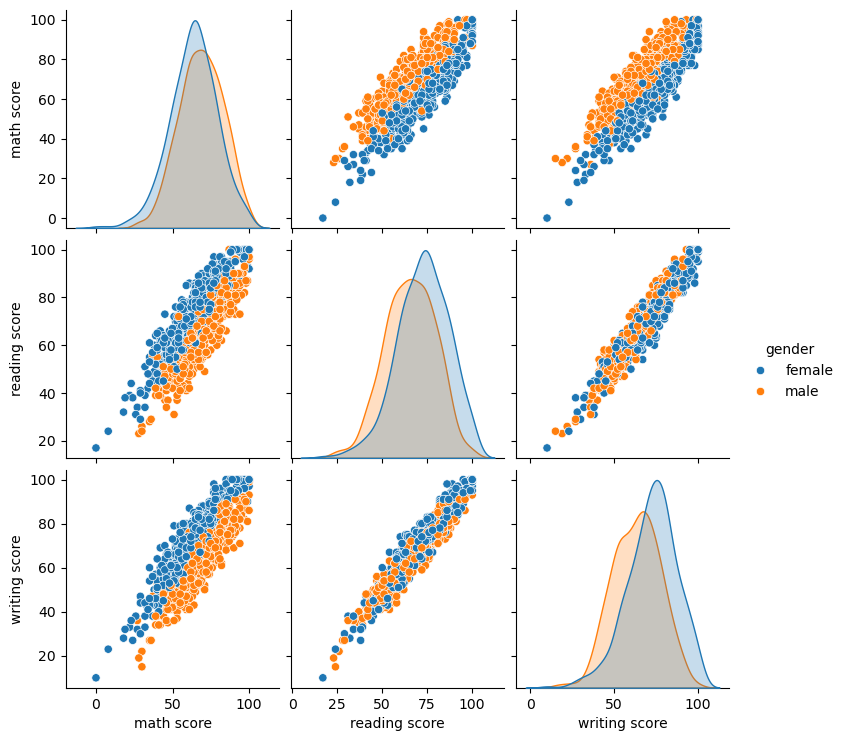

In [21]:
sns.pairplot(df, vars=['math score','reading score','writing score'],hue='gender')
plt.show()

In [24]:
from scipy import stats
male_scores=df[df['gender']=='male']['average_score']
female_scores=df[df['gender']=='female']['average_score']

In [25]:
t_stat,p_val=stats.ttest_ind(male_scores,female_scores)
print(f"T-statistic:{t_stat},P-value:{p_val}")

T-statistic:-4.169913529142,P-value:3.311973638243664e-05


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
X=df[['reading score','writing score']]
y=df['math score']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
print("Model Coefficients:",model.coef_)
print("R^2 Score:",model.score(X_test,y_test))

Model Coefficients: [0.57555997 0.27176146]
R^2 Score: 0.6825697127424626
